In [1]:
import matplotlib
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score,roc_auc_score
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
data=pd.read_csv('n_7.csv')
col=list(data.columns.values)
len(col)

47

In [3]:
X = data.drop('class', axis=1)
encode = preprocessing.LabelEncoder()
y_str2= data['class'].values
encode.fit(y_str2)
y = encode.transform(y_str2)
X= X.drop(['punnyCode','havingIP', 'doubleSlashRedirecting','port','Https_token','similar_keyword_count','similar_brand_count','path_length','=','splitted_word_count','longest_word_length','compound_word_count','std_word_length','negligible_word_count','urlLength','char_repeat','random_domain','shorteningService','brand_name_count','target_brand_count'], axis=1)
X = X.to_numpy()

In [4]:
X.shape, y.shape

((73575, 26), (73575,))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [6]:
def get_metrics(y_true, y_pred, algo):
    dict_data = {}
    
    dict_data['model_name'] = str(algo)
    dict_data['accuracy'] = accuracy_score(y_true, y_pred)
    dict_data['precision'] = precision_score(y_true, y_pred)  
    dict_data['f1'] = f1_score(y_true, y_pred)  
    dict_data['recall'] = recall_score(y_true, y_pred)  
    dict_data['roc'] = roc_auc_score(y_true, y_pred)  
    
    return dict_data

In [7]:
df_result = pd.DataFrame(columns=['accuracy','precision','f1','recall','roc'])

## GradientBoost Classifier

In [8]:
%%time
gbc = GradientBoostingClassifier(n_estimators = 200, max_depth =9, learning_rate =0.1)
gbc.fit(X_train,y_train)
predictions = gbc.predict(X_test)
data = get_metrics(y_test,predictions, 'Gradient Boosting Classifier')
df_result = df_result.append(data, ignore_index=True)

Wall time: 1min 6s


In [9]:
df_result

,accuracy,precision,f1,recall,roc,model_name
0,0.979545,0.972962,0.979716,0.986564,0.979535,Gradient Boosting Classifier


## GradientBoost Classifier - cross validation

In [ ]:
gbc = GradientBoostingClassifier(n_estimators = 200, max_depth =9, learning_rate =0.1)
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
score = cross_val_score(gbc, X, y, cv=skf, scoring="accuracy")
print(score.mean())

## Random forest classifier

In [10]:
%%time
rfc = RandomForestClassifier(n_estimators=300, random_state=27,max_depth=150)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
data = get_metrics(y_test,predictions, 'Random Forest Classifier')
df_result = df_result.append(data, ignore_index=True)

Wall time: 19.8 s


In [11]:
df_result

,accuracy,precision,f1,recall,roc,model_name
0,0.979545,0.972962,0.979716,0.986564,0.979535,Gradient Boosting Classifier
1,0.977438,0.969693,0.977655,0.985749,0.977426,Random Forest Classifier


## Random Forest Classifier - cross validation

In [ ]:
rfc = RandomForestClassifier(n_estimators=300, random_state=27,max_depth=150)
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
score = cross_val_score(rfc, X, y, cv=skf, scoring="accuracy")
print(score.mean())

# proposed ERG-SVC model

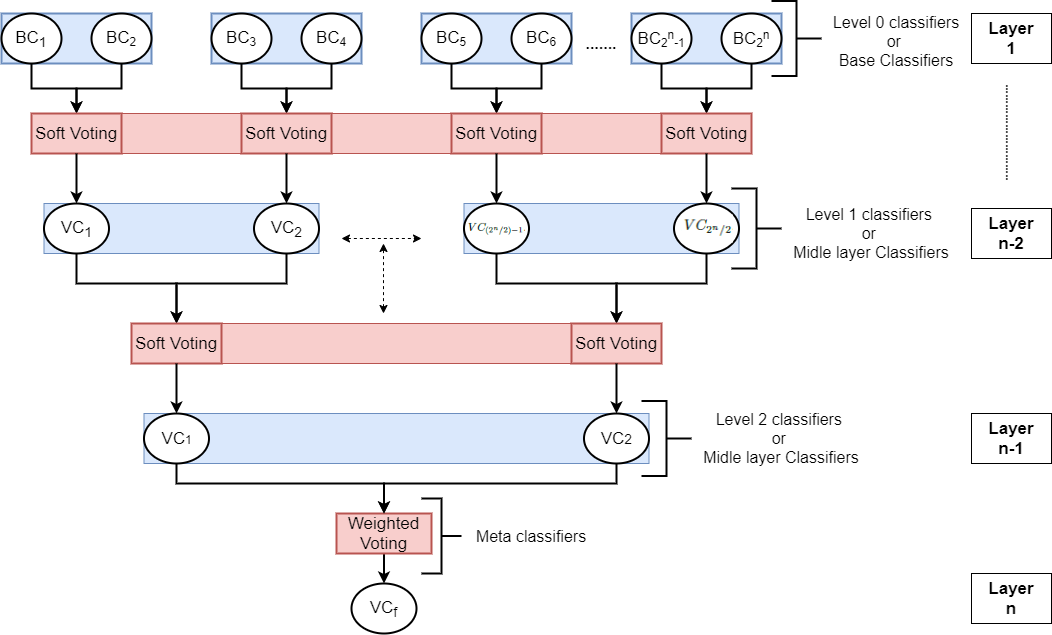

In [12]:
rfc = RandomForestClassifier(n_estimators=300, random_state=27,max_depth=150) 
gbc = GradientBoostingClassifier(n_estimators = 200, max_depth =9, learning_rate =0.1)

# level 0
vc1 = VotingClassifier(estimators=[('rfc', rfc),('gbc', gbc)],voting='soft')
vc2 = VotingClassifier(estimators=[('rfc', rfc),('gbc', gbc)],voting='soft')
vc3 = VotingClassifier(estimators=[('rfc', rfc),('gbc', gbc)],voting='soft')
vc4 = VotingClassifier(estimators=[('rfc', rfc),('gbc', gbc)],voting='soft')

# level 1
vc5 = VotingClassifier(estimators=[('vc1', vc1),('vc2', vc2)],voting='soft')
vc6 = VotingClassifier(estimators=[('vc3', vc3),('vc4', vc4)],voting='soft')

# level 2
vcf = VotingClassifier(estimators=[('vc5', vc5),('vc6', vc6)],voting='soft')

vcf.fit(X_train,y_train)
pred = vcf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)

Accuracy: 0.980224
Precision: 0.972998
Recall: 0.987921
F1 score: 0.980403


## ERG-SVC - cross validation

In [ ]:
rfc = RandomForestClassifier(n_estimators=300, random_state=27,max_depth=150) 
gbc = GradientBoostingClassifier(n_estimators = 200, max_depth =9, learning_rate =0.1)

vc1 = VotingClassifier(estimators=[('rfc', rfc),('gbc', gbc)],voting='soft')
vc2 = VotingClassifier(estimators=[('rfc', rfc),('gbc', gbc)],voting='soft')
vc3 = VotingClassifier(estimators=[('rfc', rfc),('gbc', gbc)],voting='soft')
vc4 = VotingClassifier(estimators=[('rfc', rfc),('gbc', gbc)],voting='soft')

vc5 = VotingClassifier(estimators=[('vc1', vc1),('vc2', vc2)],voting='soft')
vc6 = VotingClassifier(estimators=[('vc3', vc3),('vc4', vc4)],voting='soft')
vcf = VotingClassifier(estimators=[('vc5', vc5),('vc6', vc6)],voting='soft')

skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
score = cross_val_score(vcf, X, y, cv=skf, scoring="accuracy")
print(score.mean())